# Predictive Modeling

In [1]:
# load necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Specifying the filepath for the required files
path_cleaned = "../data/meters/cleaned/"
path_meta = "../data/metadata/"
path_weather = "../data/weather_data/"

In [3]:
df_meter = pd.read_csv(path_cleaned + "allmeters_cleaned_yearly.csv")
df_meta = pd.read_csv(path_meta + "metadata_analysis.csv")
df_weather = pd.read_csv(path_weather + "weather_data.csv")

In [4]:
df_meter.head()

,building_id,year,meter,total_meter_reading
0,Bear_assembly_Angel,2016,electricity,3.020396e+06
1,Bear_assembly_Angel,2017,electricity,4.115350e+06
2,Bear_assembly_Beatrice,2016,electricity,3.868207e+05
3,Bear_assembly_Beatrice,2017,electricity,3.652301e+05
4,Bear_assembly_Danial,2016,electricity,5.612824e+05


In [5]:
df_meter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5902 entries, 0 to 5901
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   building_id          5902 non-null   object 
 1   year                 5902 non-null   int64  
 2   meter                5902 non-null   object 
 3   total_meter_reading  5902 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 184.6+ KB


In [6]:
df_meta.head()

,building_id,site_id,sqm,primaryspaceusage,yearbuilt,region,country
0,Panther_lodging_Dean,Panther,508.8,Lodging/residential,1989.0,"Orlando, Florida",United States of America
1,Panther_lodging_Shelia,Panther,929.0,Lodging/residential,1992.0,"Orlando, Florida",United States of America
2,Panther_lodging_Ricky,Panther,483.1,Lodging/residential,2016.0,"Orlando, Florida",United States of America
3,Panther_education_Rosalie,Panther,690.5,Education,2008.0,"Orlando, Florida",United States of America
4,Panther_education_Misty,Panther,252.7,Education,2004.0,"Orlando, Florida",United States of America


In [7]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   building_id        1636 non-null   object 
 1   site_id            1636 non-null   object 
 2   sqm                1636 non-null   float64
 3   primaryspaceusage  1615 non-null   object 
 4   yearbuilt          817 non-null    float64
 5   region             1399 non-null   object 
 6   country            1399 non-null   object 
dtypes: float64(2), object(5)
memory usage: 89.6+ KB


In [8]:
df_weather.head()

,site_id,year,Avg_AirTemp_Annual,Total_HDD_Annual,Total_CDD_Annual,Count_Heating_Days_Annual,Count_Cooling_Days_Annual
0,Bear,2016,15.237956,388.21650,0.02500,146,1
1,Bear,2017,14.965894,516.45306,8.72917,160,4
2,Bobcat,2016,11.659762,2285.00220,160.28127,225,63
3,Bobcat,2017,11.485664,2419.55100,193.47684,235,68
4,Bull,2016,21.368526,337.32500,611.79584,71,146


In [9]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   site_id                    38 non-null     object 
 1   year                       38 non-null     int64  
 2   Avg_AirTemp_Annual         38 non-null     float64
 3   Total_HDD_Annual           38 non-null     float64
 4   Total_CDD_Annual           38 non-null     float64
 5   Count_Heating_Days_Annual  38 non-null     int64  
 6   Count_Cooling_Days_Annual  38 non-null     int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 2.2+ KB


In [10]:
# Merge meter with metadata on building_id, then add weather on site_id and year
df_complete = (
    df_meter
    .merge(df_meta, on="building_id", how="left")
    .merge(df_weather, on=["site_id", "year"], how="left")
)

In [11]:
df_complete.head()


,building_id,year,meter,total_meter_reading,site_id,sqm,primaryspaceusage,yearbuilt,region,country,Avg_AirTemp_Annual,Total_HDD_Annual,Total_CDD_Annual,Count_Heating_Days_Annual,Count_Cooling_Days_Annual
0,Bear_assembly_Angel,2016,electricity,3.020396e+06,Bear,22117.0,Entertainment/public assembly,1933.0,"Berkeley, California",United States of America,15.237956,388.21650,0.02500,146,1
1,Bear_assembly_Angel,2017,electricity,4.115350e+06,Bear,22117.0,Entertainment/public assembly,1933.0,"Berkeley, California",United States of America,14.965894,516.45306,8.72917,160,4
2,Bear_assembly_Beatrice,2016,electricity,3.868207e+05,Bear,2802.0,Entertainment/public assembly,1958.0,"Berkeley, California",United States of America,15.237956,388.21650,0.02500,146,1
3,Bear_assembly_Beatrice,2017,electricity,3.652301e+05,Bear,2802.0,Entertainment/public assembly,1958.0,"Berkeley, California",United States of America,14.965894,516.45306,8.72917,160,4
4,Bear_assembly_Danial,2016,electricity,5.612824e+05,Bear,7680.3,Entertainment/public assembly,2016.0,"Berkeley, California",United States of America,15.237956,388.21650,0.02500,146,1


In [14]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5902 entries, 0 to 5901
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   building_id                5902 non-null   object 
 1   year                       5902 non-null   int64  
 2   meter                      5902 non-null   object 
 3   total_meter_reading        5902 non-null   float64
 4   site_id                    5902 non-null   object 
 5   sqm                        5902 non-null   float64
 6   primaryspaceusage          5847 non-null   object 
 7   yearbuilt                  2781 non-null   Int64  
 8   region                     4897 non-null   object 
 9   country                    4897 non-null   object 
 10  Avg_AirTemp_Annual         5902 non-null   float64
 11  Total_HDD_Annual           5902 non-null   float64
 12  Total_CDD_Annual           5902 non-null   float64
 13  Count_Heating_Days_Annual  5902 non-null   int64

In [16]:
  # Ensure correct dtypes 
df_complete['yearbuilt'] = df_complete['yearbuilt'].astype('Int64')

# EDA

In [19]:
# Define target variable (what is going to be predicted) and features
# The goal is to predict 'total_meter_reading' normalized by 'sqm' (Energy Use Intensity - EUI)
df_complete['eui'] = df_complete['total_meter_reading'] / df_complete['sqm']
target = 'eui'

In [21]:
# Define which columns are numerical and which are categorical
numerical_cols = ['sqm', 'yearbuilt', 'Avg_AirTemp_Annual', 'Total_HDD_Annual',
                      'Total_CDD_Annual', 'Count_Heating_Days_Annual', 'Count_Cooling_Days_Annual', 'total_meter_reading', 'eui']
categorical_cols = ['primaryspaceusage', 'region', 'country', 'meter']

# --- Descriptive Statistics ---

In [22]:
print("\n--- Dataset Description (Numerical) ---")
print(df_complete[numerical_cols].describe())
# print(df_complete[numerical_cols + [target]].describe())


print("\n--- Dataset Description (Categorical) ---")
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    print(df_complete[col].value_counts())

# --- Data Quality Checks (Missing Values and Duplicates) ---
print("\n--- Missing Value Report (after cleaning) ---")
print(df_complete.isnull().sum())
print(f"\n--- Duplicate Rows: {df_complete.duplicated().sum()} ---")




--- Dataset Description (Numerical) ---
                sqm    yearbuilt  Avg_AirTemp_Annual  Total_HDD_Annual  \
count   5902.000000       2781.0         5902.000000       5902.000000   
mean    9240.330752  1970.142395           15.672188       1381.255068   
std    10316.382587    29.910355            5.709045       1042.428648   
min       26.300000       1900.0            7.531336         58.533333   
25%     2550.400000       1955.0           10.849792        310.833300   
50%     6100.300000       1975.0           14.965894       1417.439600   
75%    12029.525000       1996.0           21.778797       2285.002200   
max    81290.100000       2017.0           25.208960       3422.980200   

       Total_CDD_Annual  Count_Heating_Days_Annual  Count_Cooling_Days_Annual  \
count       5902.000000                5902.000000                5902.000000   
mean         332.985562                 161.117079                  82.617418   
std          436.849335                  86.82793

In [23]:
# Percentage of missing values in each feature
na_features = [features for features in df_complete.columns if df_complete[features].isnull().sum() > 0]
for features in na_features:
    # Updated to round the missing values percentage to two decimal places
    print(f"{features} : {round(df_complete[features].isnull().mean() * 100, 2)}%")

primaryspaceusage : 0.93%
yearbuilt : 52.88%
region : 17.03%
country : 17.03%


# --- Distribution of Total Meter Reading ---

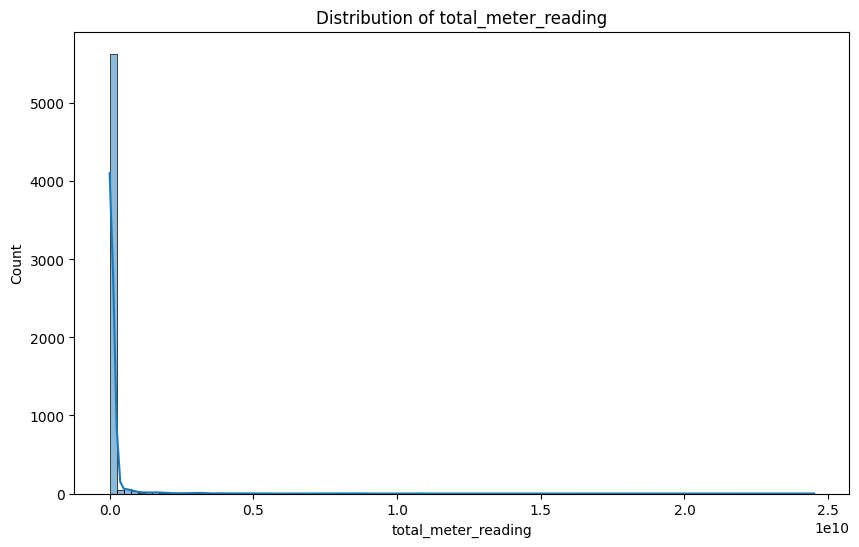

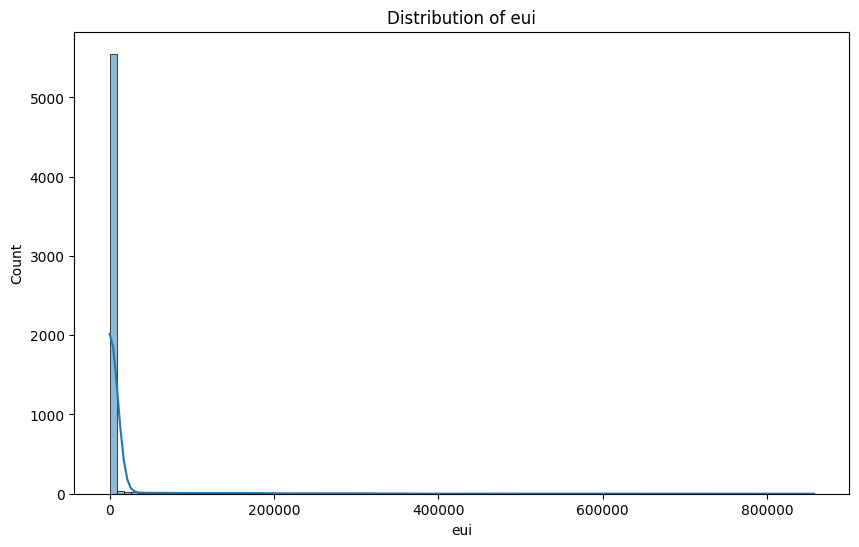

In [24]:
for column in ['total_meter_reading', 'eui']:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_complete[column], bins=100, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

The histograms show the distribution of `total_meter_reading` and `eui` (Energy Use Intensity), where the majority of values are clustered near zero, indicating heavily right-skewed distributions. High values are rare and likely represent outliers. Since both distributions are severely right-skewed, applying a log transformation may help normalize the data and improve model performance.

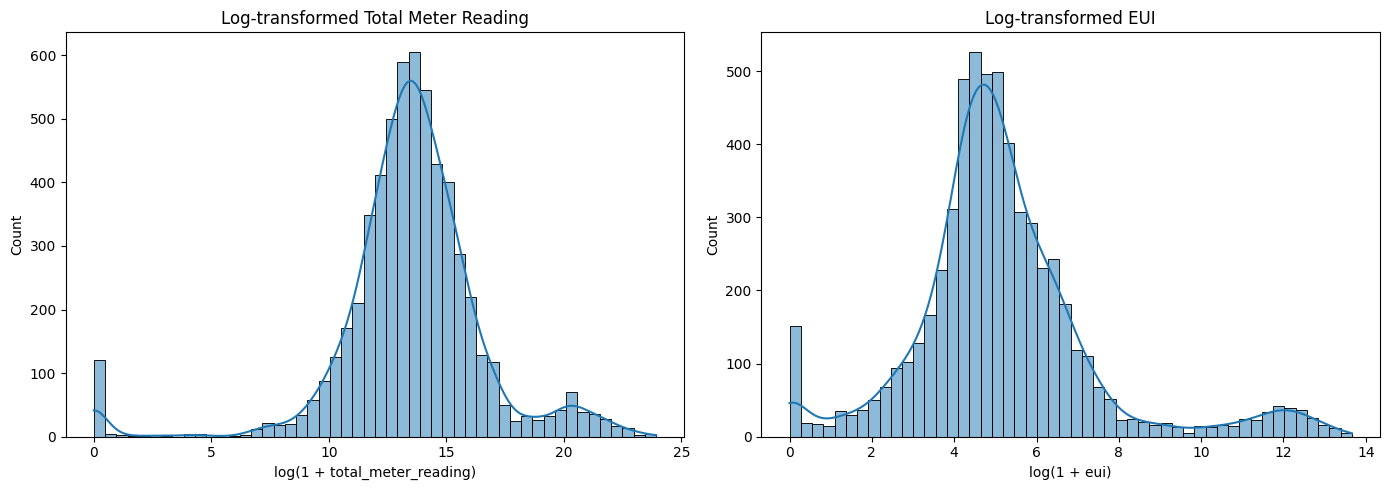

In [25]:
# Apply log transformation to total_meter_reading and eui
df_complete['log_total_meter_reading'] = np.log1p(df_complete['total_meter_reading'])
df_complete['log_eui'] = np.log1p(df_complete['eui'])

# Plot the log-transformed distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df_complete['log_total_meter_reading'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Log-transformed Total Meter Reading')
axes[0].set_xlabel('log(1 + total_meter_reading)')

sns.histplot(df_complete['log_eui'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Log-transformed EUI')
axes[1].set_xlabel('log(1 + eui)')

plt.tight_layout()
plt.show()

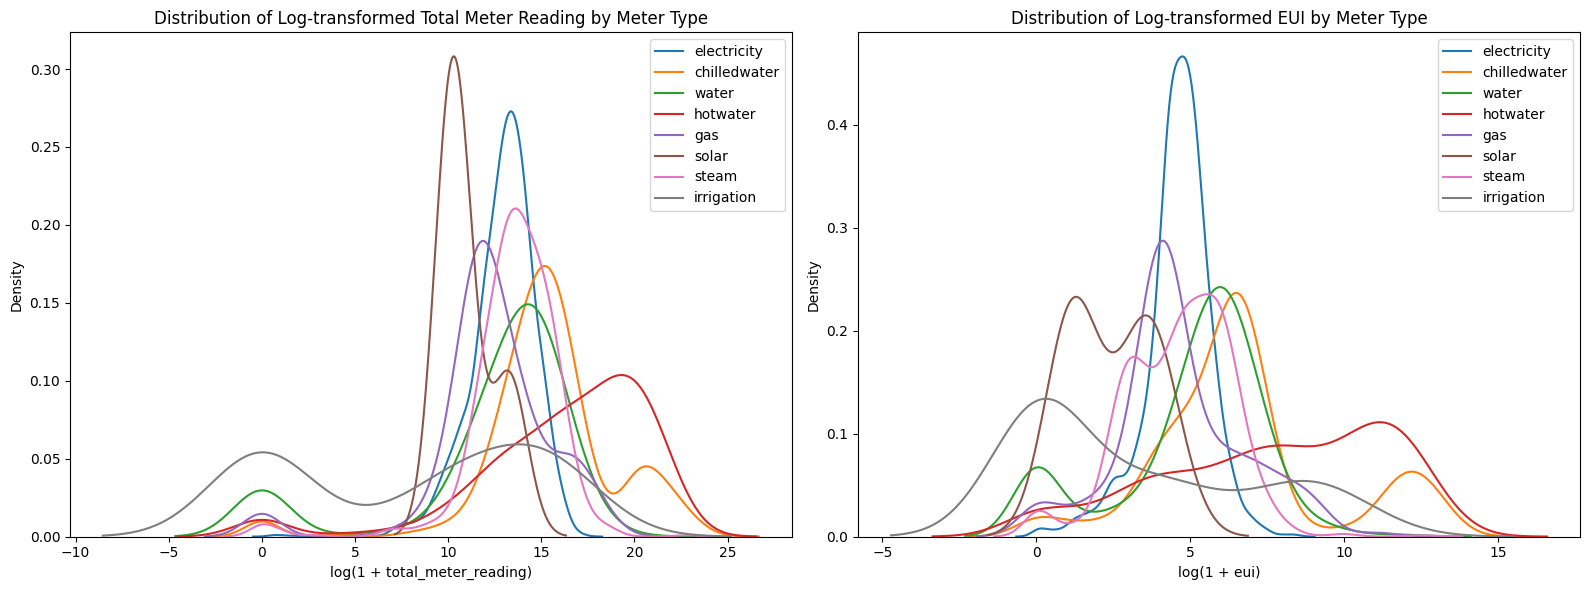

In [27]:
# Distribution of log-transformed total_meter_reading and eui by meter type
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for meter_type in df_complete['meter'].unique():
    subset = df_complete[df_complete['meter'] == meter_type]['log_total_meter_reading']
    sns.kdeplot(subset, ax=axes[0], label=meter_type)
axes[0].set_title('Distribution of Log-transformed Total Meter Reading by Meter Type')
axes[0].set_xlabel('log(1 + total_meter_reading)')
axes[0].legend()

for meter_type in df_complete['meter'].unique():
    subset = df_complete[df_complete['meter'] == meter_type]['log_eui']
    sns.kdeplot(subset, ax=axes[1], label=meter_type)
axes[1].set_title('Distribution of Log-transformed EUI by Meter Type')
axes[1].set_xlabel('log(1 + eui)')
axes[1].legend()

plt.tight_layout()
plt.show()

In [30]:
from scipy.stats import gaussian_kde

# Calculate the highest density (mode of KDE) for each meter type for both metrics

density_peaks_total = {}
density_peaks_eui = {}

for meter_type in df_complete['meter'].unique():
    subset_total = df_complete[df_complete['meter'] == meter_type]['log_total_meter_reading'].dropna()
    subset_eui = df_complete[df_complete['meter'] == meter_type]['log_eui'].dropna()
    
    # Total Meter Reading
    if len(subset_total) > 1:
        kde = gaussian_kde(subset_total)
        x_range = np.linspace(subset_total.min(), subset_total.max(), 1000)
        density = kde(x_range)
        peak_x = x_range[np.argmax(density)]
        peak_density = density.max()
        density_peaks_total[meter_type] = {
            'log_peak': peak_x,
            'original_peak': np.expm1(peak_x),
            'max_density': peak_density
        }
    
    # EUI
    if len(subset_eui) > 1:
        kde = gaussian_kde(subset_eui)
        x_range = np.linspace(subset_eui.min(), subset_eui.max(), 1000)
        density = kde(x_range)
        peak_x = x_range[np.argmax(density)]
        peak_density = density.max()
        density_peaks_eui[meter_type] = {
            'log_peak': peak_x,
            'original_peak': np.expm1(peak_x),
            'max_density': peak_density
        }

# Convert to DataFrames
df_peaks_total = pd.DataFrame(density_peaks_total).T.sort_values('max_density', ascending=False)
df_peaks_eui = pd.DataFrame(density_peaks_eui).T.sort_values('max_density', ascending=False)

print("Highest Density (KDE Peak) for Total Meter Reading by Meter Type:")
print(df_peaks_total)
print("\nHighest Density (KDE Peak) for EUI by Meter Type:")
print(df_peaks_eui)





Highest Density (KDE Peak) for Total Meter Reading by Meter Type:
               log_peak  original_peak  max_density
solar         10.301784   2.978472e+04     0.308196
electricity   13.367188   6.386979e+05     0.272942
steam         13.612370   8.161621e+05     0.210618
gas           11.870304   1.429567e+05     0.189823
chilledwater  15.182054   3.921768e+06     0.173723
water         14.292209   1.610747e+06     0.149075
hotwater      19.305093   2.421561e+08     0.103662
irrigation    13.757949   9.440628e+05     0.059192

Highest Density (KDE Peak) for EUI by Meter Type:
               log_peak  original_peak  max_density
electricity    4.748048     114.358935     0.466669
gas            4.108347      59.846040     0.287707
water          5.964252     388.261900     0.242525
chilledwater   6.482248     652.438087     0.236952
steam          5.557984     258.299482     0.235545
solar          1.294386       2.648753     0.232993
irrigation     0.312821       0.367276     0.133892

The two graphs display the distributions of energy and water consumption metrics across different meter types, using a **logarithmic transformation** to normalize the highly skewed data typically found in real-world energy consumption figures. 


### Left Graph: Distribution of Log-transformed Total Meter Reading by Meter Type 

This graph shows the overall volume of consumption or production for each meter type, regardless of the building size. 

-   **Log Transformation:** The x-axis uses log(1+total_meter_reading), which pulls large values closer to the center and spreads out small values, making the distributions easier to visualize.
-   **Dominant Consumption:** **Electricity** (blue line) and **steam** (purple line) show significant peaks further along the x-axis, indicating that these meter types generally record the highest total consumption volumes across the dataset.
-   **Multi-Modal Distributions:** Several lines (e.g., gas, hotwater, steam) exhibit multiple peaks (multi-modal distributions), which suggests there might be distinct clusters of buildings with very different use profiles (e.g., residential vs. commercial buildings, or different climates where one form of heating dominates).
-   **Low Volume:** **Solar** (dark red line) and **irrigation** (grey line) distributions are clustered farthest to the left on the x-axis, indicating lower overall readings, as would be expected for solar production or specific utility use cases. 
-  **Summary:** The individual curves (like electricity, chilledwater, steam) are visually very narrow and tall. This indicates a tight concentration of total energy volumes within relatively small ranges on the log scale.

### Right Graph: Distribution of Log-transformed EUI by Meter Type 

This graph is more useful for analyzing efficiency. It displays the **Energy Use Intensity (EUI)**, which is the total meter reading normalized by the building's square footage (reading/sqm). This allows for a standardized comparison of efficiency across buildings of different sizes. 

-   **Standardized Comparison:** By accounting for building size, the EUI plot provides a clearer picture of performance.
-   **Highest Density/Common Usage:** The **electricity** distribution (blue line) has the sharpest and highest peak around a log(1+eui) value of 4, indicating that electricity usage is very consistent among a large number of buildings in the dataset when standardized by size.
-   **Efficiency Insights:** The corresponding curves for the EUI (when normalized by sqm) are visibly wider and flatter. This indicates that while EUI standardizes the data, the resulting distribution has a greater variance or spread than the distribution of the raw total readings.
-   **Identifying Outliers/Inefficiencies:** While not explicitly showing individual data points, buildings that fall on the far right tail of their respective EUI curves (e.g., the tail of the electricity curve extending past 10) represent those that consume significantly more energy *per square meter* than their peers, marking them as potential candidates for efficiency improvements. 

### Summary 

The graphs illustrate that while **electricity and steam** account for the highest total consumption volumes (left graph), **electricity and chilledwater** have the most concentrated and commonly observed efficiency profiles (right graph). The log-transformed EUI metric is the superior measure for assessing true energy efficiency and identifying high-performing or underperforming buildings within the scope of an energy management project.

**Why is the EUI spread wider?**
While EUI is a standardized metric that is essential for benchmarking (comparing efficiency across different sized buildings), the normalization process itself reveals a wider range of efficiency performance than raw consumption volume does. In other words, they are spread out over a larger range of the x-axis.

Raw Volume is largely driven by building size (a massive building will always be near the right tail), which keeps that distribution tight.
EUI reveals that among buildings of a similar size, there can be vast differences in operational efficiency, building shell performance, or usage patterns. This inherent variability in efficiency across the building stock results in the wider, flatter distributions seen in the EUI graph.

The two graphs display the distributions of energy and water consumption metrics across different meter types, using a **logarithmic transformation** to normalize the highly skewed data typically found in real-world energy consumption figures. 

### Distribution of Log-transformed Total Meter Reading
The graph on the left illustrates the distribution of log-transformed total meter readings, showing where consumption volumes are most concentrated (density) and where those volumes typically fall (log-peak location), regardless of the building size. 

- **Solar Concentration:** The **solar** meter type exhibits the most concentrated total meter readings, registering the highest maximum density at 0.308. This peak is centered around a moderate log-value of 10.30. While solar's distribution also shows a small density cluster in the negative range, the primary mode is highly concentrated at this positive value.

- **High Volume, Low Concentration:** The **hotwater** distribution (red line) peaks at the highest log-value, 19.31. This peak corresponds to the largest typical total volume (over 242 million in original units). However, its distribution is the least concentrated of the major utilities, with a maximum density of only 0.104. This indicates that hotwater usage can reach massive volumes, but those consumption totals are highly spread out and variable across different consumers.

- **Other Utilities:**  **Electricity** shows the second-highest density (0.273), concentrated around a log-value of 13.37. The distributions for electricity and chilledwater appear visually broader than hotwater and steam, extending further right towards higher total meter readings (up to 25).

### Distribution of Log-transformed EUI (Energy Use Intensity)

The graph on the right displays the **Energy Use Intensity (EUI)**, which is the total meter reading normalized by the building's square footage (reading/sqm). This allows for a standardized comparison of efficiency across buildings of different sizes.  This graph is more useful for analyzing efficiency. It 

- **Dominant Concentration:**  **Electricity** (blue line) displays the greatest concentration by far, reaching the highest peak density of approximately **0.467**. This confirms that nearly half of all electricity EUI readings are tightly clustered around a log-EUI value of 4.75. This peak is visually the tallest and sharpest on the graph.

- **Secondary Concentration:**  **Gas** (purple/indigo) is the second most concentrated utility for EUI, with a density of 0.288, peaking at a log-EUI of 4.11. The **steam** distribution (pink/magenta) also shows a sharp peak, centered slightly to the left of the electricity peak (around a value of 3 visually).

- **Lowest Intensity Mode:** The **solar** meter type, while showing a moderate density of 0.233, registers the lowest typical intensity, peaking at a log-EUI of just 1.29. This confirms that where solar usage is observed, it represents minimal energy use intensity.

- **High EUI Variability Confirmed:** Similar to total consumption, **hotwater** registers the highest typical EUI (log-peak 11.15) but also the lowest concentration of all meter types (0.111 density). This low density coupled with a high log-peak suggests that hotwater intensity varies widely, with no strongly predictable or standard EUI value.

In summary, the analysis highlights that **electricity** exhibits remarkable **standardization and predictability** in its usage, demonstrating high concentration in both total volume and EUI. Conversely, **hotwater** is characterized by high typical volume and high typical intensity, but also **extreme variability**, indicated by low density values in both graphs.

In [ ]:
# # Separate plots for log-transformed total_meter_reading and eui by meter type

# # Plot 1: Log-transformed Total Meter Reading by Meter Type
# plt.figure(figsize=(12, 6))
# for meter_type in df_complete['meter'].unique():
#     subset = df_complete[df_complete['meter'] == meter_type]['log_total_meter_reading']
#     sns.kdeplot(subset, label=meter_type)
# plt.title('Distribution of Log-transformed Total Meter Reading by Meter Type')
# plt.xlabel('log(1 + total_meter_reading)')
# plt.ylabel('Density')
# plt.legend()
# plt.show()

# # Plot 2: Log-transformed EUI by Meter Type
# plt.figure(figsize=(12, 6))
# for meter_type in df_complete['meter'].unique():
#     subset = df_complete[df_complete['meter'] == meter_type]['log_eui']
#     sns.kdeplot(subset, label=meter_type)
# plt.title('Distribution of Log-transformed EUI by Meter Type')
# plt.xlabel('log(1 + eui)')
# plt.ylabel('Density')
# plt.legend()
# plt.show()



In [ ]:
# # IQR-based outlier detection for EUI
# series = df_complete[target].dropna()
# q1, q3 = series.quantile(0.25), series.quantile(0.75)
# iqr = q3 - q1
# lower_bound = q1 - 1.5 * iqr
# upper_bound = q3 + 1.5 * iqr

# outlier_mask = (series < lower_bound) | (series > upper_bound)
# outliers = df_complete.loc[outlier_mask]

# print(f"EUI Q1: {q1:.4f}, Q3: {q3:.4f}, IQR: {iqr:.4f}")
# print(f"Lower bound: {lower_bound:.4f}, Upper bound: {upper_bound:.4f}")
# print(f"Outlier count: {outliers.shape[0]} ({outliers.shape[0] / df_complete.shape[0]:.2%} of rows)")

# # Quick visuals
# fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# sns.boxplot(x=series, ax=axes[0], showfliers=True)
# axes[0].set_title('EUI Boxplot (with outliers)')
# axes[0].set_xlabel('EUI (kWh/sqm)')

# sns.histplot(series, bins=100, kde=True, ax=axes[1])
# axes[1].axvline(lower_bound, color='r', linestyle='--', label='IQR bounds')
# axes[1].axvline(upper_bound, color='r', linestyle='--')
# axes[1].set_title('EUI Distribution')
# axes[1].set_xlabel('EUI (kWh/sqm)')
# axes[1].legend()
# plt.show()

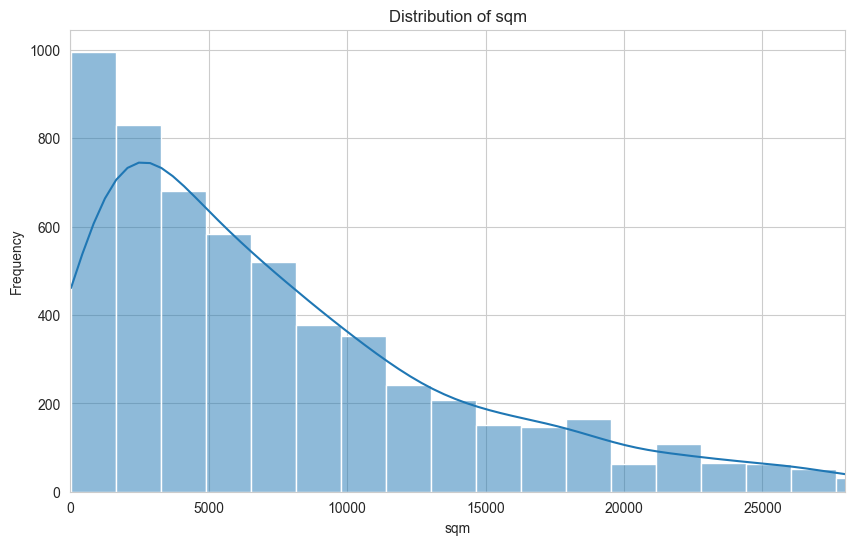

In [28]:
# --- Visual Analysis ---

# Set a style for plots
sns.set_style("whitegrid")

# 1. Distribution of the Target Variable (EUI)
plt.figure(figsize=(10, 6))
sns.histplot(df_complete['sqm'], bins=50, kde=True)
plt.title('Distribution of sqm')
plt.xlabel('sqm')
plt.ylabel('Frequency')
plt.xlim(0, df_complete['sqm'].quantile(0.95)) # Focus on the main distribution, cut outliers for clarity
plt.show()

In [ ]:
# # Handle missing values: fill 'yearbuilt' NaNs with the median yearbuilt
# df_complete['yearbuilt'].fillna(df_complete['yearbuilt'].median(), inplace=True)

In [ ]:
# import missingno as msno
# msno.matrix(df_complete)
# plt.show()

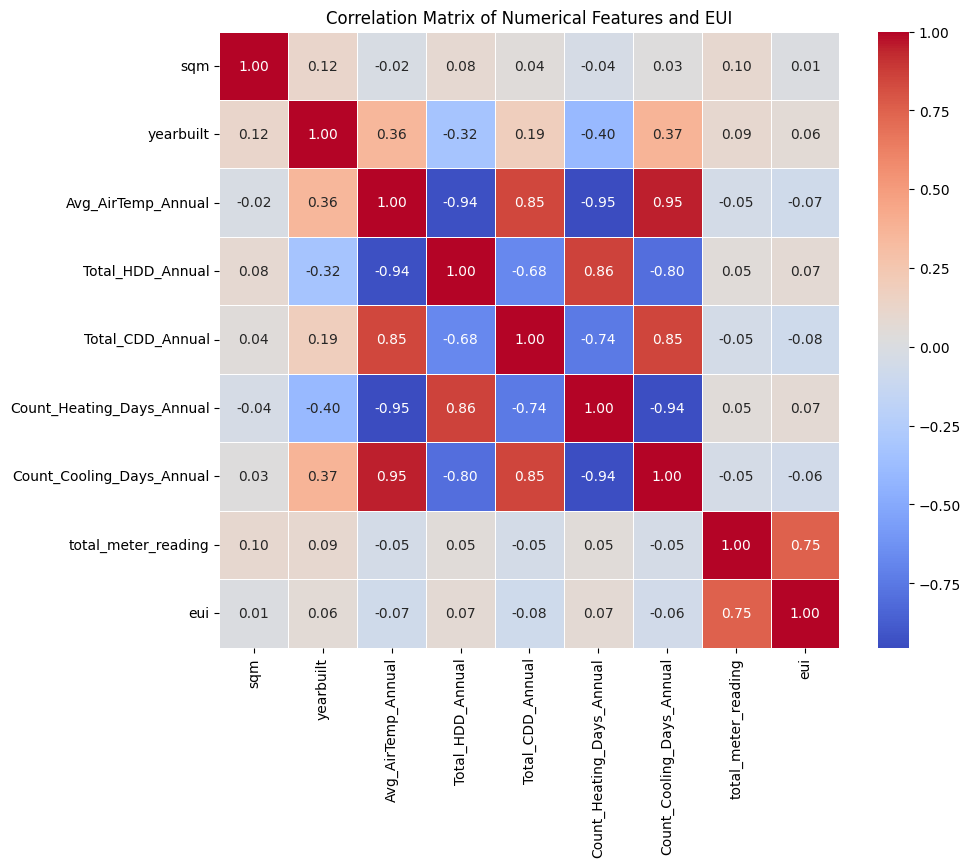

In [33]:
# 2. Correlation Heatmap for Numerical Features
plt.figure(figsize=(10, 8))
corr_matrix = df_complete[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features and EUI')
plt.show()

The correlation heatmap summarizes the linear relationships among numerical features and Energy Use Intensity (EUI).
Key Findings
1. Strongest Predictor of EUI: The most critical finding is the strong linear relationship between EUI and the raw total consumption metric: total_meter_reading correlates with EUI at 0.75. This indicates that EUI is primarily driven by the overall magnitude of meter consumption.
2. Weak Relationship with EUI: Features traditionally expected to influence building efficiency show negligible linear correlation with EUI:
• Building size (sqm) has a correlation of only 0.01 with EUI.
• All annual weather and climate variables (such as Total_HDD_Annual, Total_CDD_Annual, and Avg_AirTemp_Annual) show correlations with EUI ranging only from -0.05 to -0.07.
3. Internal Feature Correlations: The matrix highlights high redundancy among climate metrics, with near-perfect positive correlations (1.00) between metrics measuring similar conditions (e.g., cooling degree days and count of cooling days). Heating and cooling metrics are strongly negatively correlated, as expected (e.g., -0.94 between Total_HDD_Annual and Count_Cooling_Days_Annual).
In summary, the EUI variation is overwhelmingly explained by the total utility consumption volume, while building size and climate factors appear to have almost no linear association with EUI in this dataset.

In [52]:
# # Relationship between EUI and Categorical Features (Boxplots)
# for col in categorical_cols:
#     plt.figure(figsize=(12, 6))
#     sns.boxplot(x=col, y='log_eui', data=df_complete, showfliers=False) # showfliers=False to manage extreme outliers
#     plt.title(f'EUI Distribution by {col}')
#     plt.xlabel(col)
#     plt.ylabel('EUI (kWh/sqm)')
#     plt.xticks(rotation=90)
#     plt.show()

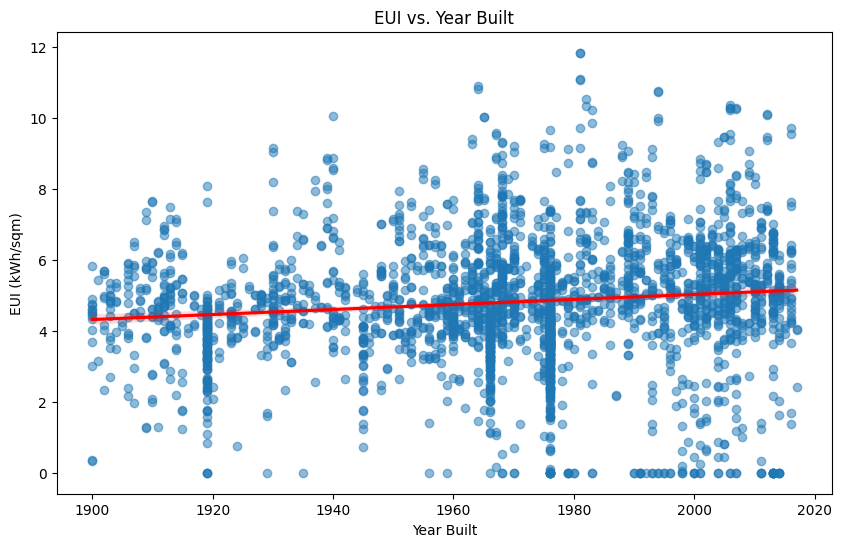

In [53]:
# Impact of Year Built
plt.figure(figsize=(10, 6))
sns.regplot(x='yearbuilt', y='log_eui', data=df_complete, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('EUI vs. Year Built')
plt.xlabel('Year Built')
plt.ylabel('EUI (kWh/sqm)')
plt.show()

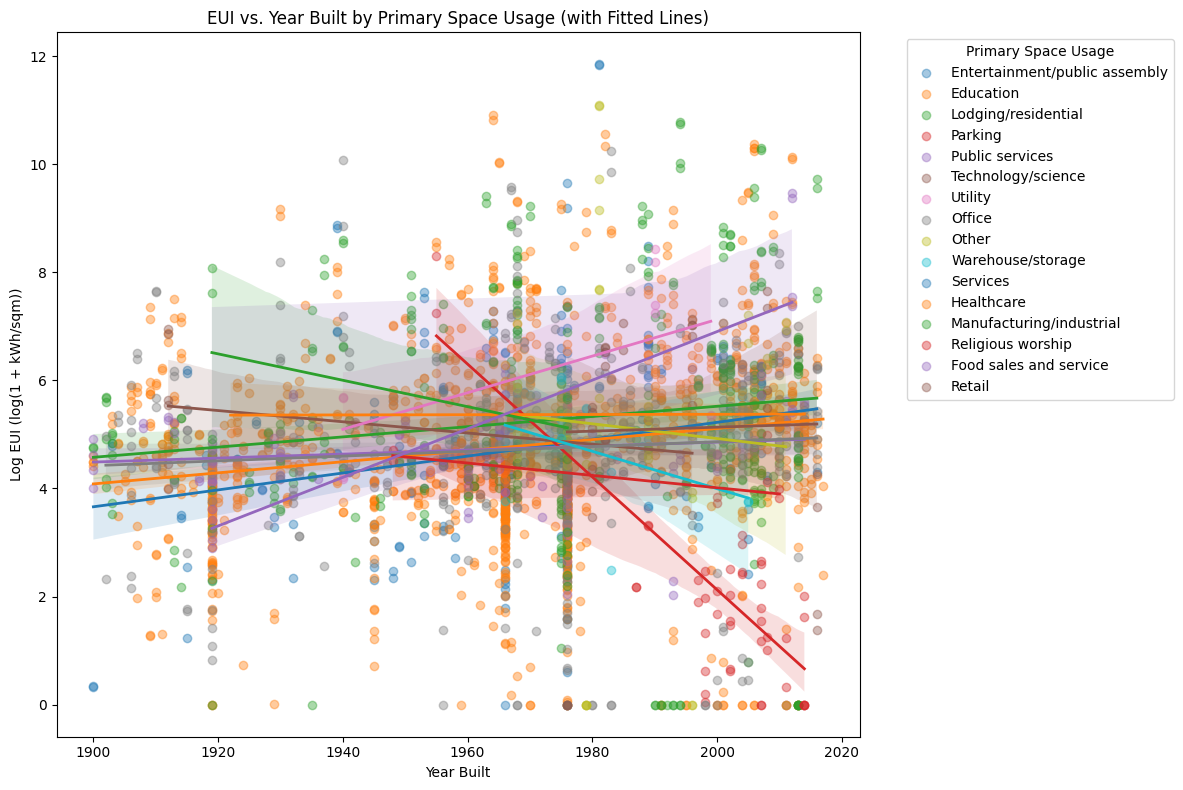

In [49]:
# Scatter plot of EUI vs Year Built, colored by Primary Space Usage with fitted lines
plt.figure(figsize=(12, 8))

# Get unique primary space usages (excluding NaN)
usages = df_complete['primaryspaceusage'].dropna().unique()

for usage in usages:
    subset = df_complete[df_complete['primaryspaceusage'] == usage]
    sns.regplot(
        data=subset,
        x='yearbuilt',
        y='log_eui',
        scatter_kws={'alpha': 0.4},
        label=usage,
        scatter=True,
        line_kws={'linewidth': 2}
    )

plt.title('EUI vs. Year Built by Primary Space Usage (with Fitted Lines)')
plt.xlabel('Year Built')
plt.ylabel('Log EUI (log(1 + kWh/sqm))')
plt.legend(title='Primary Space Usage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [54]:
# # Scatter plot of EUI vs Year Built, colored by Meter Type with fitted lines
# plt.figure(figsize=(12, 8))

# # Get unique meter types (excluding NaN)
# meters = df_complete['meter'].dropna().unique()

# for meter in meters:
#     subset = df_complete[df_complete['meter'] == meter]
#     sns.regplot(
#         data=subset,
#         x='yearbuilt',
#         y='log_eui',
#         scatter_kws={'alpha': 0.4},
#         label=meter,
#         scatter=True,
#         line_kws={'linewidth': 2}
#     )

# plt.title('EUI vs. Year Built by Meter Type (with Fitted Lines)')
# plt.xlabel('Year Built')
# plt.ylabel('Log EUI (log(1 + kWh/sqm))')
# plt.legend(title='Meter Type', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

In [56]:
# # Scatter plot of EUI vs Year Built, colored by Region with fitted lines
# plt.figure(figsize=(12, 8))

# # Get unique regions (excluding NaN)
# regions = df_complete['region'].dropna().unique()

# for region in regions:
#     subset = df_complete[df_complete['region'] == region]
#     sns.regplot(
#         data=subset,
#         x='yearbuilt',
#         y='log_eui',
#         scatter_kws={'alpha': 0.4},
#         label=region,
#         scatter=True,
#         line_kws={'linewidth': 2}
#     )

# plt.title('EUI vs. Year Built by Region (with Fitted Lines)')
# plt.xlabel('Year Built')
# plt.ylabel('Log EUI (log(1 + kWh/sqm))')
# plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

In [ ]:
# # Scatter plot of EUI vs Average Air Temperature, colored by Primary Space Usage
# plt.figure(figsize=(12, 8))
# scatter = sns.scatterplot(
#     data=df_complete,
#     x='Avg_AirTemp_Annual',
#     y='log_eui',
#     hue='primaryspaceusage',
#     alpha=0.6,
#     palette='tab10'
# )
# plt.title('EUI vs. Average Air Temperature by Primary Space Usage')
# plt.xlabel('Average Air Temperature (°C)')
# plt.ylabel('Log EUI (log(1 + kWh/sqm))')
# plt.legend(title='Primary Space Usage', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()



In [55]:
# # Impact of Average Air Temperature
# plt.figure(figsize=(10, 6))
# sns.regplot(x='Avg_AirTemp_Annual', y='log_eui', data=df_complete, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
# plt.title('EUI vs. Average Air Temperature')
# plt.xlabel('Average Air Temperature')
# plt.ylabel('EUI (kWh/sqm)')
# plt.show()

In [ ]:
# def fill_group_median(s):
#     med = s.dropna().median()
#     if pd.isna(med):
#         return s  # nothing to do if group has no non-nulls
#     med = int(med)
#     return s.fillna(med)

# df_complete['yearbuilt_imputed'] = df_complete['yearbuilt'].isna()
# df_complete['yearbuilt'] = df_complete.groupby('primaryspaceusage')['yearbuilt'].transform(fill_group_median).astype('Int64')

In [ ]:
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer

# num_imputer = SimpleImputer(strategy='median')  # returns float array
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', num_imputer, ['yearbuilt']), 
#         # add other transformers...
#     ],
#     remainder='passthrough'
# )

# # fit on training data only
# X_train_transformed = preprocessor.fit_transform(X_train)
# # If you need the value back in the DataFrame and as Int:
# imputed_yearbuilt = X_train_transformed[:, 0]  # index depends on transformer order
# df_train['yearbuilt'] = pd.Series(imputed_yearbuilt).round().astype('Int64')

In [51]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5902 entries, 0 to 5901
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   building_id                5902 non-null   object 
 1   year                       5902 non-null   int64  
 2   meter                      5902 non-null   object 
 3   total_meter_reading        5902 non-null   float64
 4   site_id                    5902 non-null   object 
 5   sqm                        5902 non-null   float64
 6   primaryspaceusage          5847 non-null   object 
 7   yearbuilt                  2781 non-null   Int64  
 8   region                     4897 non-null   object 
 9   country                    4897 non-null   object 
 10  Avg_AirTemp_Annual         5902 non-null   float64
 11  Total_HDD_Annual           5902 non-null   float64
 12  Total_CDD_Annual           5902 non-null   float64
 13  Count_Heating_Days_Annual  5902 non-null   int64

# Continue HERE

In [60]:
path = "../data/"
df = pd.read_csv(path + "df_analysis.csv")

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4897 entries, 0 to 5901
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Avg_AirTemp_Annual   4897 non-null   float64
 1   year                 4897 non-null   int64  
 2   meter                4897 non-null   object 
 3   site_id              4897 non-null   object 
 4   region               4897 non-null   object 
 5   country              4897 non-null   object 
 6   yearbuilt            2726 non-null   float64
 7   primaryspaceusage    4897 non-null   object 
 8   total_meter_reading  4897 non-null   float64
 9   eui                  4897 non-null   float64
 10  log_eui              4897 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 459.1+ KB


In [105]:
# # Drop rows where critical categorical features are missing
df.dropna(subset=['region', 'primaryspaceusage'], inplace=True)

# Select relevant features for modeling
cat_features = ['primaryspaceusage', 'region', 'meter'] # 'site_id'
num_features = ['yearbuilt', 'Avg_AirTemp_Annual']
target = 'log_eui'
features = cat_features + num_features


# # Handle missing values: fill 'yearbuilt' NaNs with the median yearbuilt
# df['yearbuilt'].fillna(df['yearbuilt'].median(), inplace=True)




In [ ]:
# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [106]:
# Group-wise (site_id) median imputation implemented as a training-safe transformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split

class GroupMedianImputer(BaseEstimator, TransformerMixin):
    """Impute a numeric column using the median per-group calculated from the training data."""
    def __init__(self, group_col, value_col, imputed_col=None):
        self.group_col = group_col
        self.value_col = value_col
        self.imputed_col = imputed_col or f"{value_col}_imputed"

    def fit(self, X, y=None):
        # Expect X to be a DataFrame
        df = X if hasattr(X, 'copy') else pd.DataFrame(X)
        # store per-group medians and a global median fallback
        self.group_medians_ = df.groupby(self.group_col)[self.value_col].median().to_dict()
        self.global_median_ = df[self.value_col].dropna().median() if df[self.value_col].dropna().size > 0 else pd.NA
        return self

    def transform(self, X):
        df = X.copy()
        # flag rows that will be imputed (based on missingness before filling)
        df[self.imputed_col] = df[self.value_col].isna()
        # map group medians (groups not present in training will map to NaN)
        df['_group_med'] = df[self.group_col].map(self.group_medians_)
        # fill with group median then global median fallback
        df[self.value_col] = df[self.value_col].fillna(df['_group_med']).fillna(self.global_median_)
        # round and preserve pandas nullable integer dtype
        # If the column is entirely missing and global_median_ is pd.NA this will keep missing values
        if not pd.isna(self.global_median_):
            df[self.value_col] = df[self.value_col].round().astype('Int64')
        df = df.drop(columns=['_group_med'])
        return df



In [107]:
# Split to avoid data leakage: fit imputers on train only
# Include 'site_id' for group-wise imputation
cols_for_split = cat_features + num_features + ['site_id']
train_df, test_df = train_test_split(df[cols_for_split], test_size=0.2, random_state=42)

y_train, y_test = train_test_split(df[target], test_size=0.2, random_state=42)

# Fit the group-wise imputer on the training fold
group_imputer = GroupMedianImputer(group_col='site_id', value_col='yearbuilt', imputed_col='yearbuilt_imputed')
train_imputed = group_imputer.fit_transform(train_df)
# Apply the same mapping to test (no leakage because we don't refit on test)
test_imputed = group_imputer.transform(test_df)

# Optionally recombine if you need a full dataset (order will change because of the split)
df_imputed = pd.concat([train_imputed, test_imputed], axis=0).reset_index(drop=True)

# Quick sanity check
print('Global median used (train):', group_imputer.global_median_)
print('Total imputed rows (yearbuilt):', df_imputed['yearbuilt_imputed'].sum())
print('\nGroup-wise medians (by site_id):')
print(pd.Series(group_imputer.group_medians_).sort_index())

Global median used (train): 1974.0
Total imputed rows (yearbuilt): 2171

Group-wise medians (by site_id):
Bear        1958.0
Bull           NaN
Cockatoo    1963.0
Crow           NaN
Fox         1970.0
Hog            NaN
Lamb        1976.0
Moose       1964.0
Mouse       1995.0
Panther     2000.0
Peacock        NaN
Rat         1960.5
Robin       1960.0
Shrew       1906.0
Wolf           NaN
dtype: float64


In [108]:
# Sites with all-NaN yearbuilt in training data
nan_sites = [site for site, med in group_imputer.group_medians_.items() if pd.isna(med)]
print(f"Sites with no valid yearbuilt (for those sites the global median is used): {len(nan_sites)}")
print(nan_sites[:10])  # show first 10

Sites with no valid yearbuilt (for those sites the global median is used): 5
['Bull', 'Crow', 'Hog', 'Peacock', 'Wolf']


In [109]:
train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3917 entries, 1056 to 1073
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   primaryspaceusage   3917 non-null   object 
 1   region              3917 non-null   object 
 2   meter               3917 non-null   object 
 3   yearbuilt           3917 non-null   Int64  
 4   Avg_AirTemp_Annual  3917 non-null   float64
 5   site_id             3917 non-null   object 
 6   yearbuilt_imputed   3917 non-null   bool   
dtypes: Int64(1), bool(1), float64(1), object(4)
memory usage: 221.9+ KB


In [113]:
train_imputed.head()

,primaryspaceusage,region,meter,yearbuilt,Avg_AirTemp_Annual,site_id,yearbuilt_imputed
1056,Entertainment/public assembly,"Town of Ithaca, New York",electricity,1951,9.133105,Cockatoo,False
3998,Manufacturing/industrial,"Cardiff, Cymru / Wales",gas,1919,11.134987,Lamb,False
4961,Public services,"Princeton, New Jersey",electricity,1974,15.128820,Peacock,True
3567,Entertainment/public assembly,"Cardiff, Cymru / Wales",electricity,1976,10.849792,Lamb,False
3700,Education,"Cardiff, Cymru / Wales",electricity,1966,11.134987,Lamb,False


In [ ]:
# # Split to avoid data leakage: fit imputers on train only
# train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
# # Fit the group-wise imputer on the training fold
# group_imputer = GroupMedianImputer(group_col='site_id', value_col='yearbuilt', imputed_col='yearbuilt_imputed')
# train_imputed = group_imputer.fit_transform(train_df)
# # Apply the same mapping to test (no leakage because we don't refit on test)
# test_imputed = group_imputer.transform(test_df)

# # Optionally recombine if you need a full dataset (order will change because of the split)
# df_imputed = pd.concat([train_imputed, test_imputed], axis=0).reset_index(drop=True)

# # Quick sanity check
# print('Global median used (train):', group_imputer.global_median_)
# print('Total imputed rows (yearbuilt):', df_imputed['yearbuilt_imputed'].sum())

In [ ]:
# # Group-wise (site_id) median imputation implemented as a training-safe transformer
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.model_selection import train_test_split

# class GroupMedianImputer(BaseEstimator, TransformerMixin):
#     """Impute a numeric column using the median per-group calculated from the training data."""
#     def __init__(self, group_col, value_col, imputed_col=None):
#         self.group_col = group_col
#         self.value_col = value_col
#         self.imputed_col = imputed_col or f"{value_col}_imputed"

#     def fit(self, X, y=None):
#         # Expect X to be a DataFrame
#         df = X if hasattr(X, 'copy') else pd.DataFrame(X)
#         # store per-group medians and a global median fallback
#         self.group_medians_ = df.groupby(self.group_col)[self.value_col].median().to_dict()
#         self.global_median_ = df[self.value_col].dropna().median() if df[self.value_col].dropna().size > 0 else pd.NA
#         return self

#     def transform(self, X):
#         df = X.copy()
#         # flag rows that will be imputed (based on missingness before filling)
#         df[self.imputed_col] = df[self.value_col].isna()
#         # map group medians (groups not present in training will map to NaN)
#         df['_group_med'] = df[self.group_col].map(self.group_medians_)
#         # fill with group median then global median fallback
#         df[self.value_col] = df[self.value_col].fillna(df['_group_med']).fillna(self.global_median_)
#         # round and preserve pandas nullable integer dtype
#         # If the column is entirely missing and global_median_ is pd.NA this will keep missing values
#         if not pd.isna(self.global_median_):
#             df[self.value_col] = df[self.value_col].round().astype('Int64')
#         df = df.drop(columns=['_group_med'])
#         return df

# # Split to avoid data leakage: fit imputers on train only
# train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
# # Fit the group-wise imputer on the training fold
# group_imputer = GroupMedianImputer(group_col='site_id', value_col='yearbuilt', imputed_col='yearbuilt_imputed')
# train_imputed = group_imputer.fit_transform(train_df)
# # Apply the same mapping to test (no leakage because we don't refit on test)
# test_imputed = group_imputer.transform(test_df)

# # Optionally recombine if you need a full dataset (order will change because of the split)
# df_imputed = pd.concat([train_imputed, test_imputed], axis=0).reset_index(drop=True)

# # Quick sanity check
# print('Global median used (train):', group_imputer.global_median_)
# print('Total imputed rows (yearbuilt):', df_imputed['yearbuilt_imputed'].sum())

In [119]:
# Create preprocessor pipeline for scaling numerical and one-hot encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features + ['site_id'])
    ],
    remainder='passthrough' # Keep other columns if any are defined
)

In [122]:
# # Step 1: Impute (already done)
# train_imputed = group_imputer.fit_transform(train_df)
# test_imputed = group_imputer.transform(test_df)

# Step 2: Extract features and target
X_train = train_imputed[cat_features + num_features + ['site_id']]
X_test = test_imputed[cat_features + num_features + ['site_id']]
# y_train = train_imputed[target]
# y_test = test_imputed[target]

# Step 3: Fit pipeline (preprocessor + model)
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline_lr.fit(X_train, y_train)
y_pred = pipeline_lr.predict(X_test)



In [123]:
# Evaluate the model (already trained above)
y_pred_lr = pipeline_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"\n--- Linear Regression Results ---")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"R-squared (R2) Score: {r2_lr:.4f}")


--- Linear Regression Results ---
Mean Squared Error (MSE): 1.8360
R-squared (R2) Score: 0.3263


In [124]:
# Create the Random Forest Regressor pipeline
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

# Train the model
print("Training Random Forest Regressor model...")
pipeline_rf.fit(X_train, y_train)
print("Random Forest training complete.")

# Evaluate the model
y_pred_rf = pipeline_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\n--- Random Forest Regressor Results ---")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"R-squared (R2) Score: {r2_rf:.4f}")

Training Random Forest Regressor model...
Random Forest training complete.

--- Random Forest Regressor Results ---
Mean Squared Error (MSE): 1.1906
R-squared (R2) Score: 0.5631


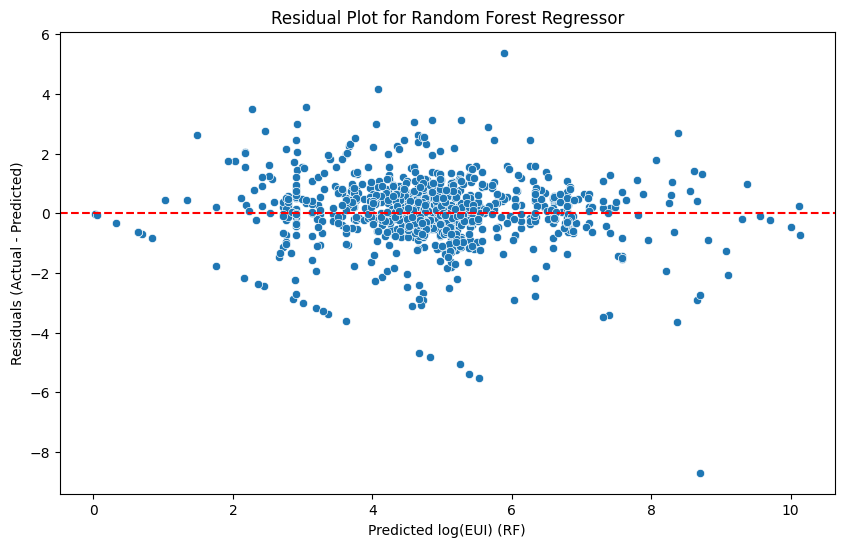


--- Top 5 Most Inefficient Buildings (for actionable insights) ---
                 primaryspaceusage                            region  \
56   Entertainment/public assembly             Princeton, New Jersey   
913                      Education                    Tempe, Arizona   
76                          Office           Greater London, England   
712            Lodging/residential                  Orlando, Florida   
222                Public services  Washington, District of Columbia   

            meter  site_id  yearbuilt  Actual_log_EUI  Predicted_log_EUI  \
56   chilledwater  Peacock       1974       11.271710           5.893106   
913      hotwater      Fox       1957        8.244462           4.083607   
76       hotwater    Robin       1960        6.601586           3.048867   
712    irrigation  Panther       2007        5.775525           2.267153   
222   electricity      Rat       1960        7.988829           4.857627   

     Residual  
56   5.378604  
913  4.160

In [125]:
# Analyze residuals for the better-performing model (likely Random Forest)
residuals = y_test.values - y_pred_rf

# Plotting residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rf, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted log(EUI) (RF)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for Random Forest Regressor')
plt.show()

# Identify top 5 most inefficient buildings (highest positive residuals = actual EUI much higher than predicted)
# Merge test set features back to analyze specific building characteristics
X_test_reset = X_test.reset_index(drop=True)
results_df = pd.DataFrame({
    'Actual_log_EUI': y_test.values, 
    'Predicted_log_EUI': y_pred_rf, 
    'Residual': residuals
})
results_df = pd.concat([X_test_reset, results_df], axis=1)

# Sort by residual to find buildings that use far more energy than peer buildings
inefficient_buildings = results_df.sort_values(by='Residual', ascending=False).head(5)

print("\n--- Top 5 Most Inefficient Buildings (for actionable insights) ---")
print(inefficient_buildings[['primaryspaceusage', 'region', 'meter', 'site_id', 'yearbuilt', 
                              'Actual_log_EUI', 'Predicted_log_EUI', 'Residual']])

# Insights: These buildings are candidates for energy audits or targeted retrofits 
# because they underperform compared to the model's expectation.

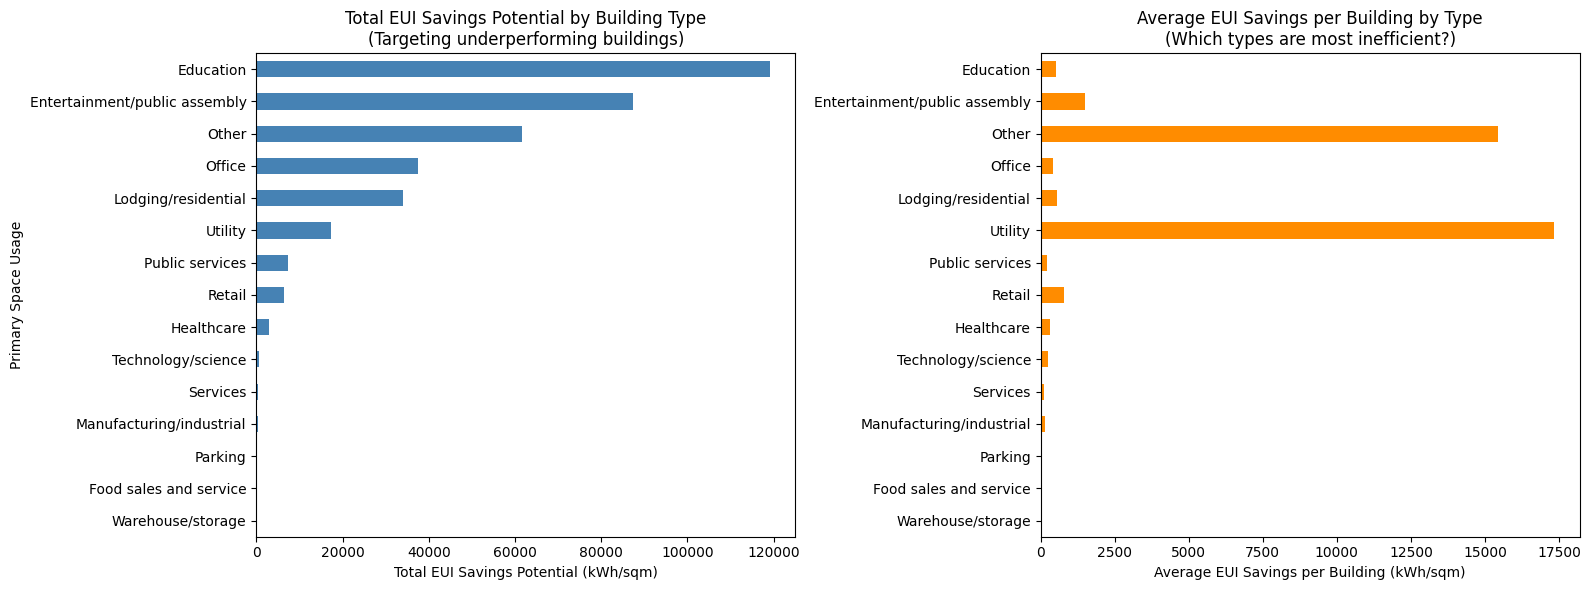


--- Savings Potential Summary by Building Type ---
                               Total_Savings_Potential  \
primaryspaceusage                                        
Education                                    119054.85   
Entertainment/public assembly                 87313.85   
Other                                         61730.47   
Office                                        37615.62   
Lodging/residential                           34117.09   
Utility                                       17329.03   
Public services                                7368.34   
Retail                                         6387.26   
Healthcare                                     2984.91   
Technology/science                              522.07   
Services                                        485.28   
Manufacturing/industrial                        294.65   
Parking                                         159.47   
Food sales and service                           63.29   
Warehouse/storage   

In [126]:
# Actionable Insights: Potential EUI Savings by Building Category
# Calculate the "savings potential" - how much each building could save if it performed at the predicted level

# Add original EUI values (back-transform from log scale)
results_df['Actual_EUI'] = np.expm1(results_df['Actual_log_EUI'])
results_df['Predicted_EUI'] = np.expm1(results_df['Predicted_log_EUI'])
results_df['EUI_Savings_Potential'] = results_df['Actual_EUI'] - results_df['Predicted_EUI']

# Only consider buildings with positive residuals (underperformers)
underperformers = results_df[results_df['Residual'] > 0].copy()

# Aggregate savings potential by primary space usage
savings_by_usage = underperformers.groupby('primaryspaceusage').agg({
    'EUI_Savings_Potential': ['sum', 'mean', 'count']
}).round(2)
savings_by_usage.columns = ['Total_Savings_Potential', 'Avg_Savings_per_Building', 'Count']
savings_by_usage = savings_by_usage.sort_values('Total_Savings_Potential', ascending=False)

# Visualization: Which building types have the highest total savings potential?
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Total savings potential by building type
savings_by_usage['Total_Savings_Potential'].plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_xlabel('Total EUI Savings Potential (kWh/sqm)')
axes[0].set_ylabel('Primary Space Usage')
axes[0].set_title('Total EUI Savings Potential by Building Type\n(Targeting underperforming buildings)')
axes[0].invert_yaxis()

# Plot 2: Average savings per building (identifies which types are most inefficient on average)
savings_by_usage['Avg_Savings_per_Building'].plot(kind='barh', ax=axes[1], color='darkorange')
axes[1].set_xlabel('Average EUI Savings per Building (kWh/sqm)')
axes[1].set_ylabel('')
axes[1].set_title('Average EUI Savings per Building by Type\n(Which types are most inefficient?)')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\n--- Savings Potential Summary by Building Type ---")
print(savings_by_usage)
print(f"\nTotal potential EUI savings across all underperformers: {underperformers['EUI_Savings_Potential'].sum():.2f} kWh/sqm")

This visualization shows EUI Savings Potential by Building Type. This helps prioritize which building categories to target for energy efficiency improvements:

Left plot (Total Savings): Shows aggregate savings potential—useful for portfolio-level decisions about where to focus resources
Right plot (Average Savings): Shows which building types are most inefficient on average—useful for identifying systemic issues with certain building types
Why this is actionable for CO2 reduction:

The buildings with positive residuals (actual > predicted) are using more energy than expected compared to peers
By targeting these underperformers, you focus retrofits where they'll have the biggest impact
The breakdown by primaryspaceusage helps prioritize interventions (e.g., "focus on offices first" or "education buildings need attention")

Educational buildings are at the top of the left chart (Total Savings Potential), that means they have the greatest aggregate savings potential across the buildings portfolio.

However, there are two ways to interpret "greatest savings potential":

Total Savings Potential (left chart): Educational buildings may rank highest because:

There are many educational buildings in the dataset
They tend to be large buildings
Combined, they offer the most total kWh/sqm that could be saved
Average Savings per Building (right chart): This tells you which building type is most inefficient on average. If another type (e.g., healthcare or industrial) ranks higher here, individual buildings of that type are worse performers—but there may be fewer of them.

For CO2 reduction strategy:

If budget is limited: Target the building types with highest average savings per building—you get more impact per retrofit
If scaling is the goal: Target building types with highest total savings—more aggregate CO2 reduction across your portfolio

**Individual buildings of these types are the most inefficient on average** --- when an "Other" or "Utility" building underperforms, it underperforms by a lot compared to its peers.

This tells a different story than the left chart:

| Chart | What it shows | Implication |
| --- | --- | --- |
| **Left (Total)** | Educational buildings likely have more total savings potential | Many educational buildings, or they're large --- aggregate opportunity |
| **Right (Average)** | Other/Utility buildings have highest per-building inefficiency | Fewer of them, but each one is a bigger outlier when it underperforms |

**Actionable insight for CO2 reduction:**

1.  **Quick wins**: Target "Other" and "Utility" buildings first --- fewer buildings to audit, but each retrofit yields high savings per building
2.  **Scale impact**: Then focus on Educational buildings for aggregate portfolio-wide savings

The reason "Other" and "Utility" might show high average inefficiency could be:

-   Heterogeneous category (lumps together diverse buildings with no clear benchmark)
-   Specialized equipment with high variability
-   Less standardized operations compared to offices or schools

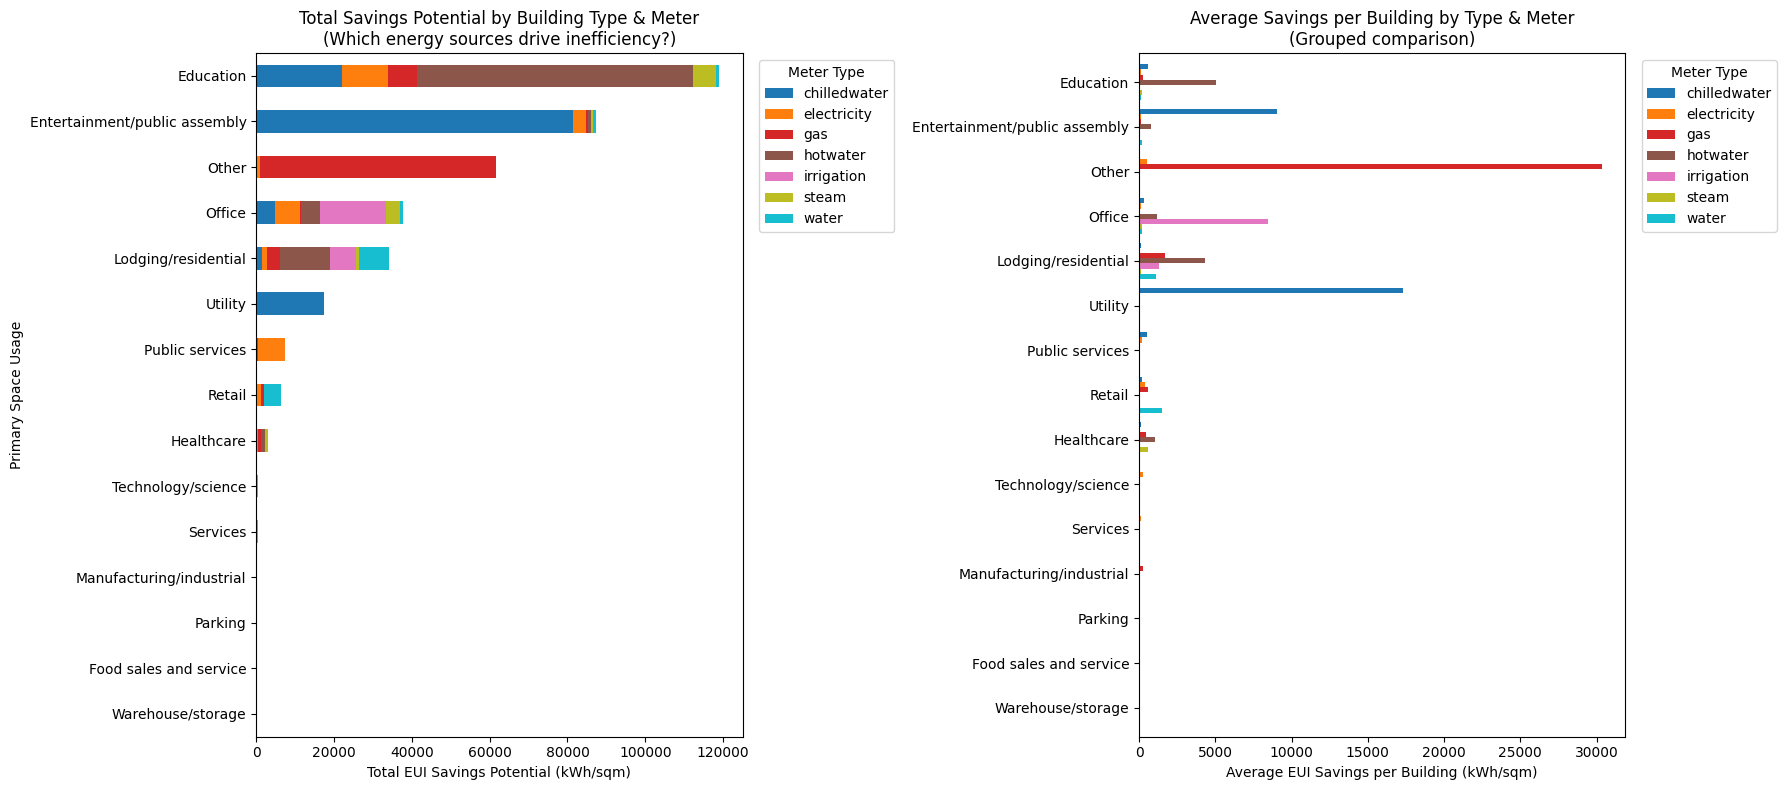


--- Savings Potential by Building Type and Meter ---
            primaryspaceusage        meter  Total_Savings  Avg_Savings  Count
                    Education     hotwater       70881.70      5062.98     14
                    Education chilledwater       21975.39       578.30     38
                    Education  electricity       11969.57       115.09    104
                    Education          gas        7374.33       263.37     28
                    Education        steam        5939.05       204.79     29
                    Education        water         903.28       100.36      9
                    Education   irrigation          11.51        11.51      1
Entertainment/public assembly chilledwater       81344.04      9038.23      9
Entertainment/public assembly  electricity        3459.64        98.85     35
Entertainment/public assembly        water         874.23       218.56      4
Entertainment/public assembly     hotwater         780.91       780.91      1
Entertainm

In [127]:
# Breakdown: Savings Potential by Building Type AND Meter Type
# This helps identify which energy source drives inefficiency for each building category

savings_by_usage_meter = underperformers.groupby(['primaryspaceusage', 'meter']).agg({
    'EUI_Savings_Potential': ['sum', 'mean', 'count']
}).round(2)
savings_by_usage_meter.columns = ['Total_Savings', 'Avg_Savings', 'Count']
savings_by_usage_meter = savings_by_usage_meter.reset_index()

# Create a pivot table for visualization
pivot_total = savings_by_usage_meter.pivot(index='primaryspaceusage', columns='meter', values='Total_Savings').fillna(0)
pivot_avg = savings_by_usage_meter.pivot(index='primaryspaceusage', columns='meter', values='Avg_Savings').fillna(0)

# Sort by total savings across all meters
pivot_total = pivot_total.loc[pivot_total.sum(axis=1).sort_values(ascending=False).index]
pivot_avg = pivot_avg.reindex(pivot_total.index)

# Stacked bar chart: Total savings by building type, broken down by meter
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

pivot_total.plot(kind='barh', stacked=True, ax=axes[0], colormap='tab10')
axes[0].set_xlabel('Total EUI Savings Potential (kWh/sqm)')
axes[0].set_ylabel('Primary Space Usage')
axes[0].set_title('Total Savings Potential by Building Type & Meter\n(Which energy sources drive inefficiency?)')
axes[0].legend(title='Meter Type', bbox_to_anchor=(1.02, 1), loc='upper left')
axes[0].invert_yaxis()

pivot_avg.plot(kind='barh', stacked=False, ax=axes[1], colormap='tab10', width=0.8)
axes[1].set_xlabel('Average EUI Savings per Building (kWh/sqm)')
axes[1].set_ylabel('')
axes[1].set_title('Average Savings per Building by Type & Meter\n(Grouped comparison)')
axes[1].legend(title='Meter Type', bbox_to_anchor=(1.02, 1), loc='upper left')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

# Summary table
print("\n--- Savings Potential by Building Type and Meter ---")
print(savings_by_usage_meter.sort_values(['primaryspaceusage', 'Total_Savings'], ascending=[True, False]).to_string(index=False))

This visualization breaks down savings potential by both building type and meter type. 
It shows:

Left chart (Stacked bars): For each building type, which meter types (electricity, gas, steam, etc.) contribute most to the total inefficiency
Right chart (Grouped bars): Average savings per building for each building type, compared across meter types
This is important for CO2 reduction because:

Electricity and gas have different carbon intensities
If "Other" and "Utility" buildings' inefficiency is driven by gas or steam, that's a higher priority for decarbonization
If it's driven by electricity, the CO2 impact depends on the grid's carbon intensity


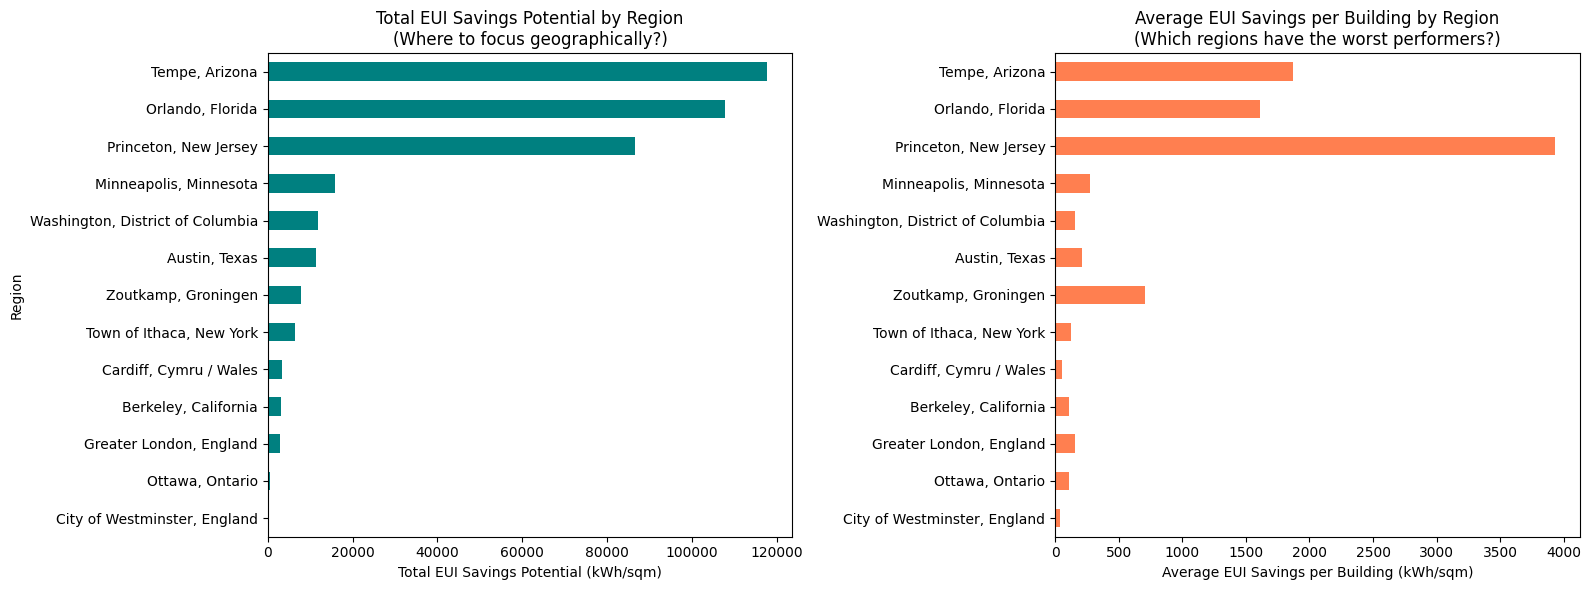


--- Savings Potential Summary by Region ---
                                  Total_Savings_Potential  \
region                                                      
Tempe, Arizona                                  117733.48   
Orlando, Florida                                107875.44   
Princeton, New Jersey                            86465.19   
Minneapolis, Minnesota                           15936.26   
Washington, District of Columbia                 11790.91   
Austin, Texas                                    11466.44   
Zoutkamp, Groningen                               7757.18   
Town of Ithaca, New York                          6504.92   
Cardiff, Cymru / Wales                            3340.31   
Berkeley, California                              3104.48   
Greater London, England                           2839.58   
Ottawa, Ontario                                    552.53   
City of Westminster, England                       119.51   

                                  Avg_S

In [128]:
# Savings Potential by Region
# Identify which geographic regions have the most opportunity for CO2 reduction

savings_by_region = underperformers.groupby('region').agg({
    'EUI_Savings_Potential': ['sum', 'mean', 'count']
}).round(2)
savings_by_region.columns = ['Total_Savings_Potential', 'Avg_Savings_per_Building', 'Count']
savings_by_region = savings_by_region.sort_values('Total_Savings_Potential', ascending=False)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Total savings potential by region
savings_by_region['Total_Savings_Potential'].plot(kind='barh', ax=axes[0], color='teal')
axes[0].set_xlabel('Total EUI Savings Potential (kWh/sqm)')
axes[0].set_ylabel('Region')
axes[0].set_title('Total EUI Savings Potential by Region\n(Where to focus geographically?)')
axes[0].invert_yaxis()

# Plot 2: Average savings per building by region
savings_by_region['Avg_Savings_per_Building'].plot(kind='barh', ax=axes[1], color='coral')
axes[1].set_xlabel('Average EUI Savings per Building (kWh/sqm)')
axes[1].set_ylabel('')
axes[1].set_title('Average EUI Savings per Building by Region\n(Which regions have the worst performers?)')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\n--- Savings Potential Summary by Region ---")
print(savings_by_region)
print(f"\nRegion with highest total savings potential: {savings_by_region.index[0]}")
print(f"Region with highest average inefficiency: {savings_by_region['Avg_Savings_per_Building'].idxmax()}")

Left chart: Total EUI savings potential by region — identifies where to focus geographically for maximum aggregate impact
Right chart: Average savings per building by region — identifies which regions have the most inefficient buildings on average
This helps prioritize retrofit programs by location, which is useful for:

Regional policy targeting
Allocating resources to specific offices/branches
Understanding if climate or local building practices contribute to inefficiency

In [ ]:
# # Apply group-wise imputation to the full dataset 
# # This fits the GroupMedianImputer on the entire df_complete and transforms it in-place.
# # Note: This approach can cause data leakage if you later split into train/test sets.
# # Impute the entire dataset in-place (aware of leakage), 
# full_imputer = GroupMedianImputer(group_col='site_id', value_col='yearbuilt', imputed_col='yearbuilt_imputed')
# df_complete = full_imputer.fit_transform(df_complete)
# print('Imputed (full) count:', df_complete['yearbuilt_imputed'].sum())